In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import matplotlib.ticker as ticker
import csv

In [2]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

In [3]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

### Plot

In [4]:
def plot_multi_tfs_sec_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, fs= [28,22]):
    
    linestyles = ["--", "-", "-."]
    labels = []

    res = []
    max_val = -1
    # sum
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        # variation
        fin_res_var = [None]
        for i in range(1, len(result)):
            fin_res_var.append(result[i] - result[i-1])
            
        # second variation
        fin_sec_res_var = [None, None]
        for i in range(2, len(result)):
            fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
            
        res.append(fin_sec_res_var)
        
        max_val = max(max_val, max(fin_sec_res_var[2:]))
        
        if d.split("_")[1] == "10":
            labels.append(d[:-9])
        else:
            labels.append(f'{d.split("_")[0]} \u2192 {d.split("_")[2]}')
    

    plt.figure(figsize=(12, 4))
    
    max_val = -1
    for i in range(len(res)):
        max_val = max(max_val, max([r if r != None else 0 for r in res[i]]))
        if "\u2192" not in labels[i]:
            plt.plot(res[i], label=labels[i], linewidth=2, linestyle='--')
        elif labels[i].split(' \u2192 ')[0].split('-')[1] == labels[i].split(' \u2192 ')[1].split('-')[1]:
            plt.plot(res[i], label=labels[i], linewidth=2, linestyle='--')
        else:
            plt.plot(res[i], label=labels[i], linewidth=2, linestyle=linestyles[i%3])
            

    ax = plt.gca()
    tick_step = 10000
    y_max = ax.get_ylim()[1]
    # Generate new y-ticks based on the maximum y value
    new_yticks = np.arange(0, y_max + tick_step, tick_step)
    ax.set_yticks(new_yticks)
    ax.set_yticklabels([f'{int(tick/tick_step)}.0' for tick in new_yticks])
    # Annotate the y-axis with the scientific notation multiplier
    ax.annotate(r'$\times 10^4$', xy=(0, 1), xycoords='axes fraction', fontsize=12,
                xytext=(10, 5), textcoords='offset points', ha='center')
    ax.spines[['top', 'right']].set_visible(False)
        
    # Add labels and legend
    plt.xlabel('Time (sec)', fontsize=fs[0])
    plt.ylabel('$N\'\'$', fontsize=fs[0])
    # plt.title('TFS Second Difference', fontsize=20)
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=fs[0])
    plt.yticks(size=fs[0])
    plt.xlim(-1, 51)
    # plt.ylim(top=max_val*1.2)
    plt.legend(ncol=1, fontsize=fs[1], handlelength=0.75,borderpad=0.15)
    plt.tight_layout()
    plt.grid()

    # Show the plot
    plt.show()
    

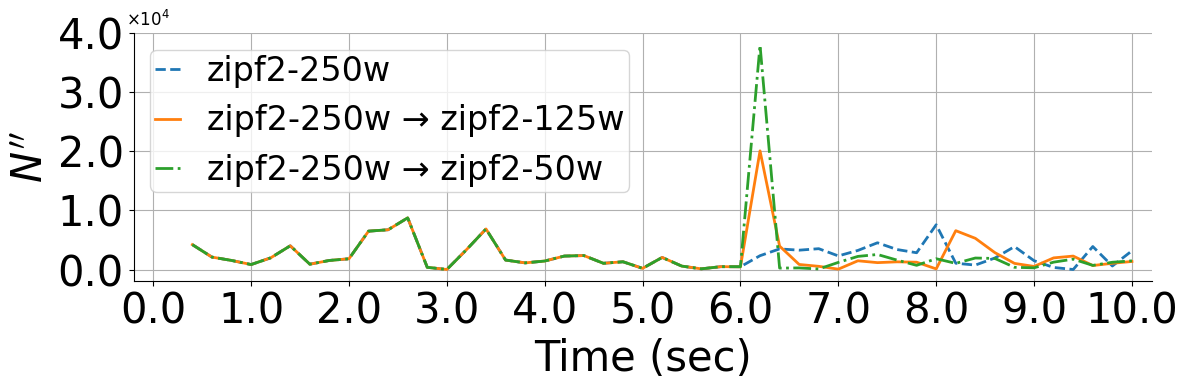

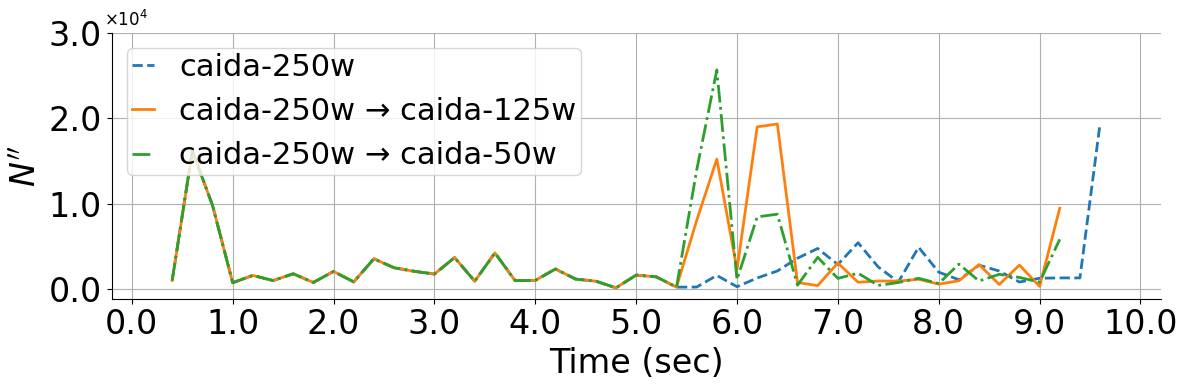

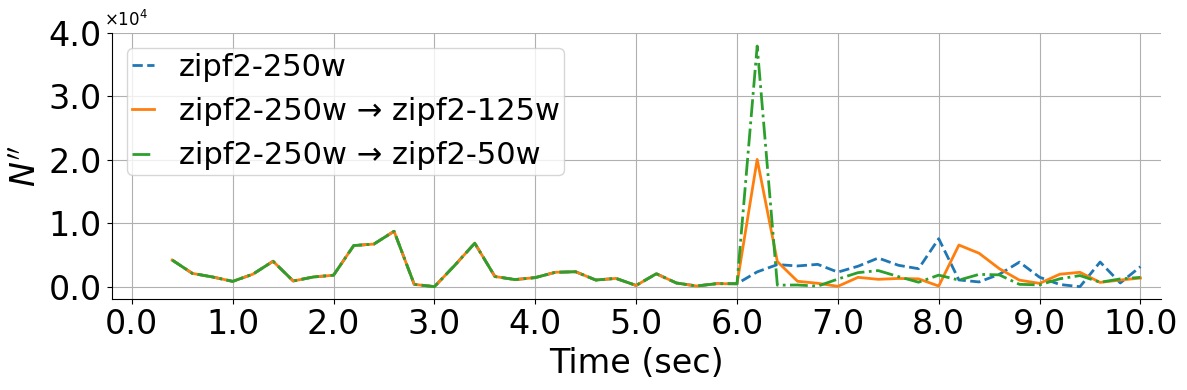

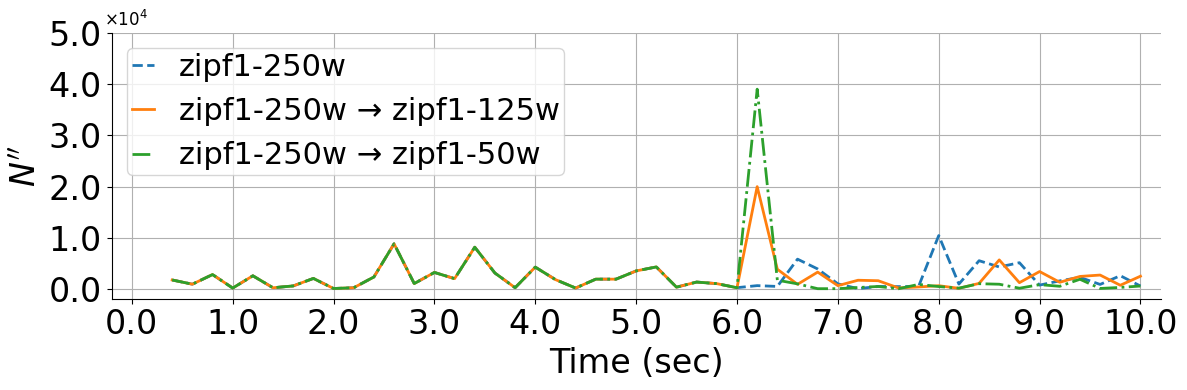

In [44]:
# slides
plot_multi_tfs_sec_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[30,24])
# plot_multi_tfs_sec_var(datasets=pcap_file[58:61])

# thesis
plot_multi_tfs_sec_var(datasets=pcap_file[1:2] + pcap_file[80:82], fs=[24,22])
plot_multi_tfs_sec_var(datasets=pcap_file[4:5] + pcap_file[88:90], fs=[24,22])
plot_multi_tfs_sec_var(datasets=pcap_file[7:8] + pcap_file[94:96], fs=[24,22])


### Predict

In [5]:
def changes_occured(var, sec_var, n, ws=20):
    
    time_var = -1.0
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window
    for i in range(len(var) - ws + 1):
        var_mean = np.mean(var[0+i:ws+i])
        var_std_dev = np.std(var[0+i:ws+i])
        
        # check by var outliers
        if abs(var[ws+i-1] - var_mean) > (n * var_std_dev):
            if time_var == -1.0:
                time_var = (1+(ws+i-1)-1)/5
                break
                
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (2 + sec_var.index(val) - 1)/5
        
    
    var_hit = 0
    sec_var_hit = 0
    
    if time_var != -1.0:
        var_hit = 1
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return var_hit, time_var, sec_var_hit, time_sec_var, val, max_time
    
    

In [8]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, dev=3, ws=20):
    
    # total flow size
    res_sum3 = {}
    res_var3 = {}
    res_sec_var3 = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var3[name] = [None]
            res_sec_var3[name] = [None, None]
            
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum3[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var3[name].append(res_total[i] - res_total[i-1])
                
            for i in range(2, len(res_var3[name])):
                res_sec_var3[name].append(abs(res_var3[name][i] - res_var3[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    # ws = 20
    
    pred3 = []
    
    norm_hit3 = 0
    iqr_hit3 = 0
    
    hit3 = []
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = changes_occured(res_var3[label[i]][1:], res_sec_var3[label[i]][2:], dev, ws)
        
        pred3.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var3[label[i]])
        # print(f'\t\tvar: {time_var}, ans: {answer[i]}, change: {var_hit}')
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit3.append(1)
            else:
                hit3.append(0)
        else:
            if sec_var_hit == 1:
                hit3.append(1)
            else:
                hit3.append(0)
            
        

    succ3 = 0

    for i in range(len(label)):
        if hit3[i] == 1:
            if answer[i] == 10:
                succ3 += 1
            else:
                if abs(pred3[i] - answer[i]) <= 1.0:
                    succ3 += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    

In [9]:
predict(width=widths, datasets=pcap_file[0:10], window_size=200, dev=3, ws=25)
predict(width=widths, datasets=pcap_file[10:100], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[10:22], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[22:34], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[34:46], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[46:58], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[58:67], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[67:76], window_size=200, dev=3, ws=25)

# predict(width=widths, datasets=pcap_file[76:88], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[88:94], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[94:100], window_size=200, dev=3, ws=25)


0
caida-500w_10__4096
	Total Flow 
		 [None, None, 6615, 36129, 28284, 819, 314, 6116, 87, 636, 1074, 9990, 5717, 1634, 3644, 3363, 1630, 1551, 6035, 5751, 2698, 1456, 1890, 4139, 1165, 3075, 5059, 3337, 1263, 2427, 2500, 2300, 1251, 4330, 3296, 1811, 3201, 1792, 2646, 8952, 4252, 1601, 175, 2234, 1445, 11993, 3677, 1635, 35753]
		sec var: 7.6, ans: 10, change: 1
		8952, max time: -1.0

1
caida-250w_10__4096
	Total Flow 
		 [None, None, 1001, 16191, 9812, 737, 1595, 994, 1787, 770, 2064, 834, 3548, 2491, 2077, 1757, 3688, 918, 4237, 982, 1014, 2347, 1164, 924, 141, 1632, 1426, 220, 231, 1594, 271, 1292, 2115, 3613, 4753, 2873, 5428, 2585, 820, 4896, 1978, 1084, 2793, 2110, 818, 1262, 1305, 1301, 19440]
		sec var: 9.4, ans: 10, change: 1
		19440, max time: -1.0

2
caida-125w_10__4096
	Total Flow 
		 [None, None, 2186, 10283, 10021, 770, 399, 3058, 793, 942, 925, 1149, 573, 969, 2867, 531, 2805, 309, 372, 2628, 663, 1608, 1827, 418, 3309, 1547, 1346, 801, 3642, 5028, 2311, 354, 742, 968,

### Predict TFS value

In [8]:
def predict_tfs_val(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], 
                dataset='zipf2a_3_caida20180517_7.pcap', window_size=200, start_time=30, predict_length=2, 
                gt_dataset='caida0517-500w_10_.pcap'):
    

    res = []
    # sum
    gt_result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, gt_dataset, window_size)[-1] 
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)[start_time:]
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    res.append(fin_res_var)
    

    actual_tfs = gt_result
    predict_tfs = sum(fin_res_var[1:min(len(fin_res_var), 1+int(predict_length*1000/window_size))]) * (10/predict_length)
    # print(actual_tfs, predict_tfs, abs(predict_tfs-actual_tfs))
    RE = round(abs(predict_tfs-actual_tfs)/actual_tfs, 2)
    
    return RE
    

In [5]:
def predict_tfs(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], 
                dataset='zipf2a_3_caida20180517_7.pcap', window_size=200, start_time=30, predict_length=2, 
                gt_dataset='caida0517-500w_10_.pcap'):
    
    answer = {5000000: '500w',
              2500000: '250w', 
              1250000: '125w', 
              500000: '50w',
              }
    res = []
    # sum
    gt_result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, gt_dataset, window_size)[-1] 
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)[start_time:]
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    res.append(fin_res_var)
    

    actual_tfs = gt_result
    predict_tfs = sum(fin_res_var[1:min(len(fin_res_var), 1+int(predict_length*1000/window_size))]) * (10/predict_length)
    
    closest_key = min(answer.keys(), key=lambda x: abs(x - predict_tfs)**2)
    closest_value = answer[closest_key]
    
    return closest_value
    

Accuracy  = 88.0 %
Precision = 85.7 %
Recall    = 100.0 %
F1Score   = 92.3 %
TNR    = 57.1 %


/tmp/ipykernel_5858/161609421.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes1, fontsize=16)
/tmp/ipykernel_5858/161609421.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes2, fontsize=16)


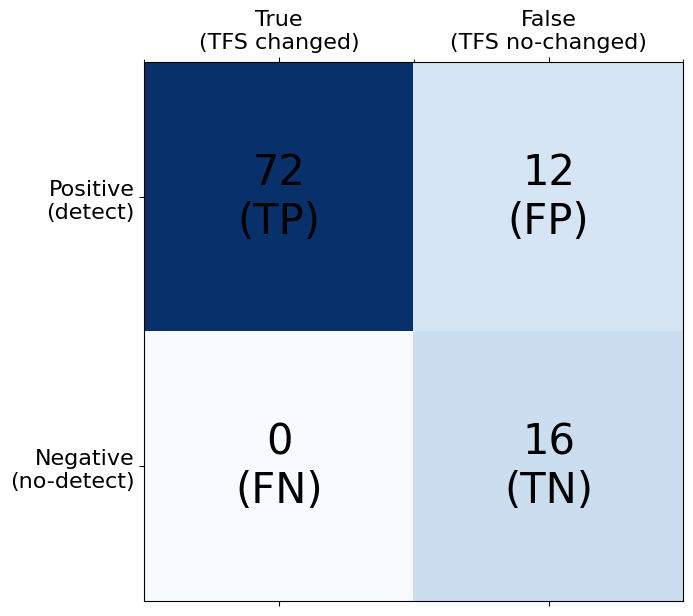

Accuracy  = 52.0 %
Precision = 44.0 %
Recall    = 97.4 %
F1Score   = 60.6 %
TNR    = 24.2 %


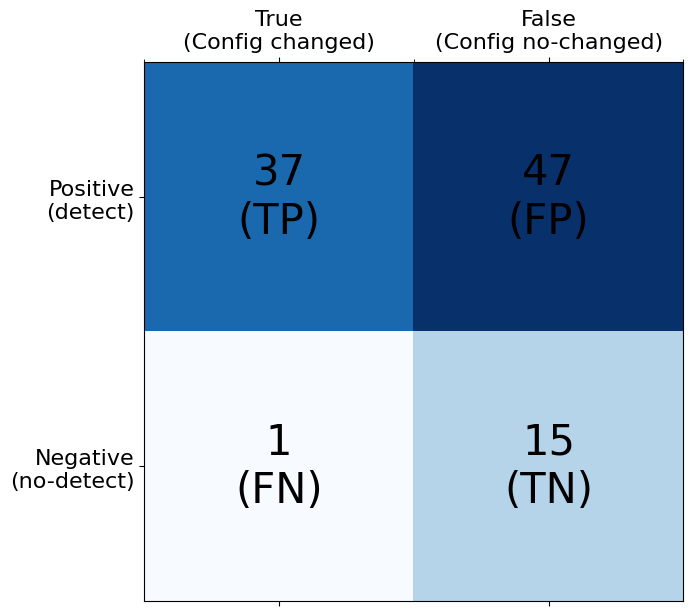

In [35]:
def plot_confusion_matrix(cm, type):
    # Confusion matrix values
    # cm = np.array([[50, 10], 
    #                [5, 35]])
    
    acc = round((cm[0][0] + cm[1][1])*100 / (sum(cm[0])+sum(cm[1])), 1)
    pre = round((cm[0][0])* 100 / (sum(cm[0]) ), 1)
    recall = round((cm[0][0])* 100 / (cm[0][0] + cm[1][0]), 1)
    f1score = round(2*(pre*recall) / (pre + recall), 1)
    tnr = round((cm[1][1])* 100 / (cm[0][1] + cm[1][1]), 1)
    
    print(f'Accuracy  = {acc} %')
    print(f'Precision = {pre} %')
    print(f'Recall    = {recall} %')
    print(f'F1Score   = {f1score} %')
    print(f'TNR    = {tnr} %')

    # Class labels
    classes1 = [f'True\n({type} changed)', f'False\n({type} no-changed)']
    classes2 = ['Positive\n(detect)', 'Negative\n(no-detect)']

    # Create the plot
    fig, ax = plt.subplots(figsize=(7,7))
    cax = ax.matshow(cm, interpolation='nearest', cmap='Blues')

    # Add colorbar
    # plt.colorbar(cax, shrink=0.8)

    # Set axis labels
    ax.set_xticklabels([''] + classes1, fontsize=16)
    ax.set_yticklabels([''] + classes2, fontsize=16)

    # Add annotations
    for (i, j), val in np.ndenumerate(cm):
        if (i, j) == (0, 0):
            plt.text(j, i, f'{val}\n(TP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (0, 1):
            plt.text(j, i, f'{val}\n(FP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 0):
            plt.text(j, i, f'{val}\n(FN)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 1):
            plt.text(j, i, f'{val}\n(TN)', ha='center', va='center', color='black', fontsize=30)

    # Customize gridlines and layout
    ax.set_xticks(np.arange(-0.5, len(classes1), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(classes2), 1), minor=True)
    ax.tick_params(which='minor', bottom=False, left=False)

    # Add title
    # plt.title('Confusion Matrix', fontsize=20)

    plt.show()


plot_confusion_matrix(cm=[[72, 12], [0, 16]], type="TFS")
plot_confusion_matrix(cm=[[37, 47], [1, 15]], type="Config")

{-1.0: [20.0, 26.67, 55.56, 77.78], -0.4: [53.33, 83.33, 95.56, 100.0], -0.2: [53.33, 95.56, 100.0, 100.0], 0: [90.0, 100.0, 100.0, 100.0], 0.2: [100.0, 100.0, 100.0, 100.0], 0.4: [86.67, 100.0, 100.0, 100.0], 1.0: [100.0, 100.0, 100.0, 96.67]}


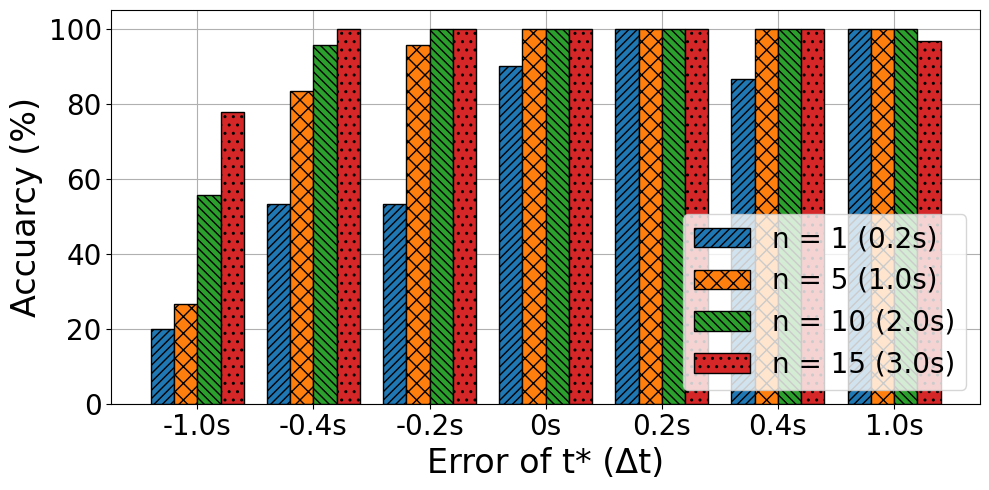

In [8]:
def plot_tfs_detection_time_impact(lens=[0.2, 0.4, 1.0, 2.0], plot_type="ARE", fs=[24,20,20]):
    all_datasets = zipf1 + caida + zipf2
    # categories = ['Same TFS\nSame DIST', 'Same TFS\nDiff DIST', 'Diff TFS\nSame DIST', 'Diff TFS\nDiff DIST']
    
    x_labels = [-1.0, -0.4, -0.2, 0, 0.2, 0.4, 1.0]
    
    res = {}
    for dt in x_labels:
        res[dt] = []
        offset = int(dt/0.2)
        for l in lens:
            if plot_type == "ARE":
                AREs = 0.
                for a in all_datasets:
                    for b in all_datasets:
                        gt_dataset = f'{b}_10_.pcap'
                        if a != b:
                            dataset = f'{a}_6_{b}_4.pcap'
                            AREs += predict_tfs_val(dataset=dataset, start_time=30+offset, predict_length=l, gt_dataset=gt_dataset)
                                
                res[dt].append(round((AREs/90)*100,2))
            elif plot_type == "Accuracy":
                succ = 0
                for a in all_datasets:
                    for b in all_datasets:
                        gt_dataset = f'{b}_10_.pcap'
                        if a != b:
                            dataset = f'{a}_6_{b}_4.pcap'
                            pred = predict_tfs(dataset=dataset, start_time=30+offset, predict_length=l, gt_dataset=gt_dataset)
                            if pred == b.split('-')[1]:
                                succ += 1
                res[dt].append(round((succ/90)*100,2))
                                
    print(res)
    
    # Convert the dictionary to a list of rows, assuming the lists have the same length
    keys = list(res.keys())
    num_rows = len(next(iter(res.values())))
    rows = []

    for i in range(num_rows):
        row = [res[key][i] for key in keys]
        rows.append(row)

    # Writing the data to a CSV file
    with open('../result_plot/4_pattern_identification/tfs/output.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(keys)
        
        # Write the rows
        writer.writerows(rows)

    
    # Organize the data
    
    all_data = [res[dt] for dt in x_labels]
    
    # Settings
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['////', 'XX', '\\\\\\\\', '..']
    bar_width = 0.2
    x = np.arange(len(x_labels))

    # Plot
    fig, ax = plt.subplots(figsize=(10,5))

    for i, time in enumerate(lens):
        bar_positions = x + i * bar_width - bar_width * 1.5  # Adjust positions
        bar_values = [all_data[j][i] for j in range(len(x_labels))]
        ax.bar(bar_positions, bar_values, bar_width, label=f'n = {int(time/0.2)} ({time}s)', color=colors[i], hatch=hatches[i], edgecolor='black', zorder=2)
        # ax.bar(bar_positions, bar_values, bar_width, color=colors, edgecolor='black', hatch=hatches[i])


    # Plotting the first subplot
    # bars1 = ax1.bar(np.arange(4), res, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in len])
    # Adding labels and title
    ax.set_xlabel('Error of t* (\u0394t)', fontsize=fs[0])
    if plot_type == "ARE":
        ax.set_ylabel('MRE', fontsize=fs[0])
    else:
        ax.set_ylabel('Accuarcy (%)', fontsize=fs[0])
    # ax.set_title(f'Impact of detection errors & identification time', fontsize=20)
    # ax.set_ylim(0, 20)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks(x)
    ax.set_xticklabels(f'{xlabel}s' for xlabel in x_labels)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.legend(fontsize=fs[2], loc='lower right')

    # # Create custom legend handles with no fill color
    # from matplotlib.patches import Patch
    # legend_handles = [Patch(facecolor='none', edgecolor='black', hatch=hatches[i], label=f't = {x_labels[i]}s') for i in range(len(x_labels))]
    # # legend_handles = [Patch(facecolor='none', color=colors[i], edgecolor='black', label=f't = {x_labels[i]}s') for i in range(len(x_labels))]

    # # Apply custom legend to the plot
    # ax.legend(handles=legend_handles, fontsize=16)
    
    plt.grid(zorder=0)
    plt.tight_layout()
    plt.show()
    
# plot_tfs_detection_time_impact(lens=[0.2, 0.4, 1.0, 2.0], plot_type="ARE")
plot_tfs_detection_time_impact(lens=[0.2, 1.0, 2.0, 3.0], plot_type="Accuracy")